In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os 
from time import time
from kaggle.api.kaggle_api_extended import KaggleApi

In [5]:
base_path = 'C:/Users/Federico/Desktop/Maestria Data mining/DM EyF/'
dataset_path = base_path + 'datasets/'
modelos_path = base_path + 'modelos/'
db_path = base_path + 'db/'
dataset_file = 'ensamble_shpa_200_semillas.csv'
dataset_file_2 = 'ensamble_gustavo_200_semillas.csv'


data_shap = pd.read_csv(dataset_path + dataset_file)
data_gv = pd.read_csv(dataset_path + dataset_file_2)

In [78]:
# Concatenar por numero de cliente y quedarse con la probabilidad más alta
df_combined = pd.concat([data_shap, data_shap]).groupby('numero_de_cliente').agg({'Probabilidad': 'max'}).reset_index()

In [79]:
data_gv.shape

(164876, 3)

In [80]:
# Ordenar de mayor a menor probabilidad
df_combined = df_combined.sort_values(by='Probabilidad', ascending=False).reset_index(drop=True)


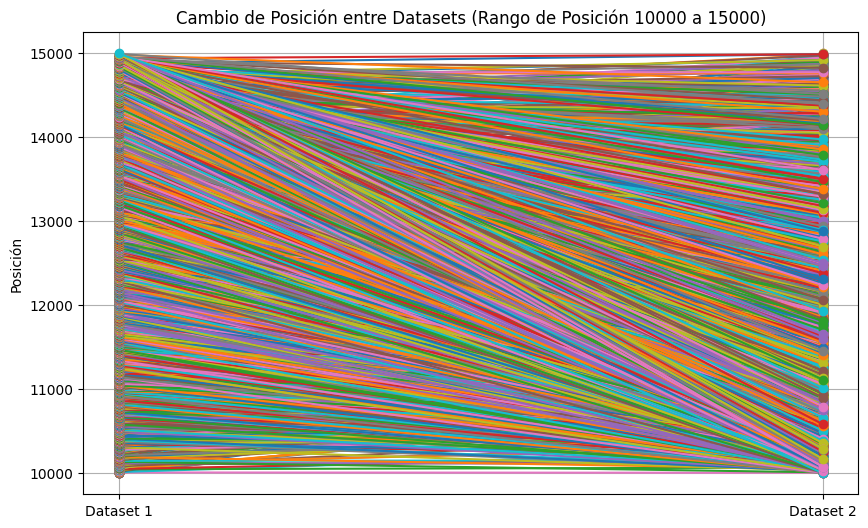

In [59]:
posicion_min = 10000
posicion_max = 15000

# Seleccionar solo las filas que están dentro de este rango de posiciones
data_shap_sorted = data_shap[(data_shap['posicion'] >= posicion_min) & (data_shap['posicion'] <= posicion_max)]
data_gv_sorted = data_gv[(data_gv['posicion'] >= posicion_min) & (data_gv['posicion'] <= posicion_max)]

# Merge para ver cómo cambian las posiciones en el rango seleccionado
df_posiciones = pd.merge(data_shap_sorted[['numero_de_cliente', 'posicion']], 
                         data_gv_sorted[['numero_de_cliente', 'posicion']], 
                         on='numero_de_cliente', 
                         suffixes=('_df1', '_df2'))

# Graficar el cambio de posiciones en el rango seleccionado
plt.figure(figsize=(10, 6))
for _, row in df_posiciones.iterrows():
    plt.plot([1, 2], [row['posicion_df1'], row['posicion_df2']], marker='o', label=f"Cliente {row['numero_de_cliente']}")

plt.xticks([1, 2], ['Dataset 1', 'Dataset 2'])
plt.ylabel('Posición')
plt.title(f'Cambio de Posición entre Datasets (Rango de Posición {posicion_min} a {posicion_max})')
plt.grid(True)
plt.show()

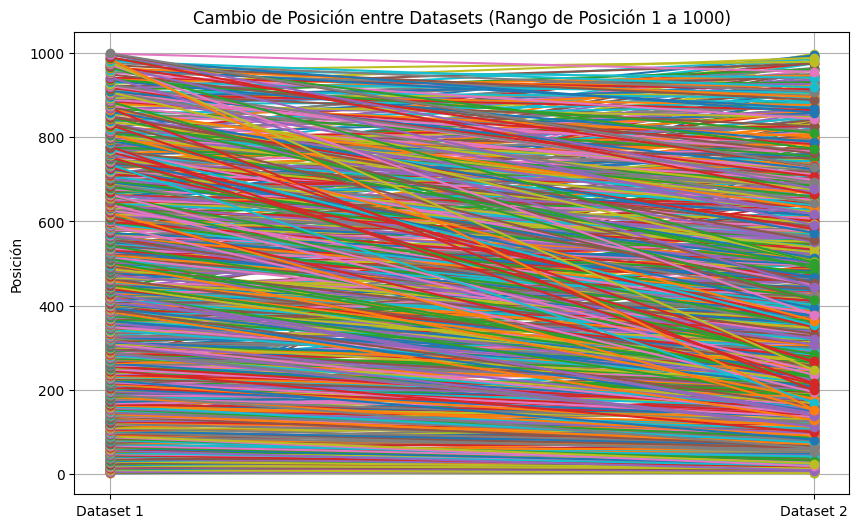

In [112]:
posicion_min = 1
posicion_max = 1000

# Seleccionar solo las filas que están dentro de este rango de posiciones
data_shap_sorted = data_shap[(data_shap['posicion'] >= posicion_min) & (data_shap['posicion'] <= posicion_max)]
data_gv_sorted = data_gv[(data_gv['posicion'] >= posicion_min) & (data_gv['posicion'] <= posicion_max)]

# Merge para ver cómo cambian las posiciones en el rango seleccionado
df_posiciones = pd.merge(data_shap_sorted[['numero_de_cliente', 'posicion']], 
                         data_gv_sorted[['numero_de_cliente', 'posicion']], 
                         on='numero_de_cliente', 
                         suffixes=('_df1', '_df2'))

# Graficar el cambio de posiciones en el rango seleccionado
plt.figure(figsize=(10, 6))
for _, row in df_posiciones.iterrows():
    plt.plot([1, 2], [row['posicion_df1'], row['posicion_df2']], marker='o', label=f"Cliente {row['numero_de_cliente']}")

plt.xticks([1, 2], ['Dataset 1', 'Dataset 2'])
plt.ylabel('Posición')
plt.title(f'Cambio de Posición entre Datasets (Rango de Posición {posicion_min} a {posicion_max})')
plt.grid(True)
plt.show()

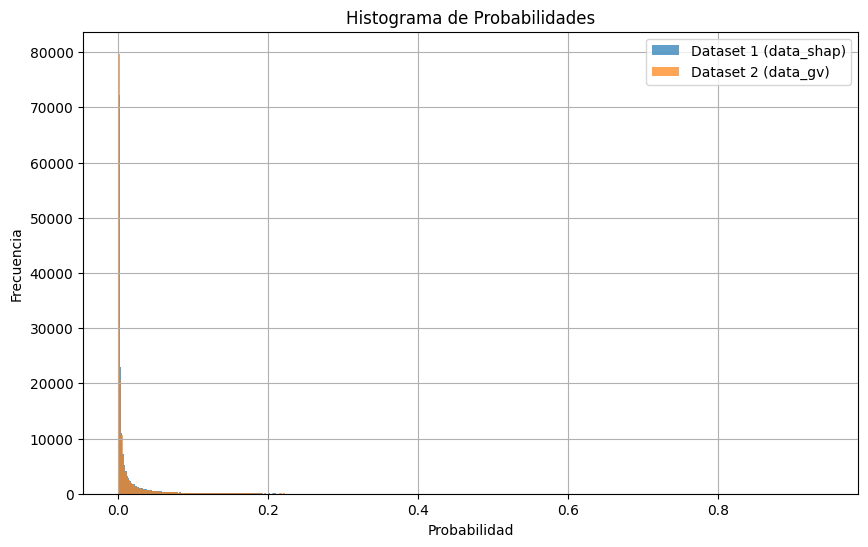

In [36]:
bins = 500  # Ajusta este número según lo que quieras

# Crear el histograma para la columna 'Probabilidad' de uno de los datasets
plt.figure(figsize=(10, 6))
plt.hist(data_shap['Probabilidad'], bins=bins, alpha=0.7, label='Dataset 1 (data_shap)')
plt.hist(data_gv['Probabilidad'], bins=bins, alpha=0.7, label='Dataset 2 (data_gv)')

# Agregar títulos y etiquetas
plt.title('Histograma de Probabilidades')
plt.xlabel('Probabilidad')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right')
plt.grid(True)

# Mostrar el histograma
plt.show()

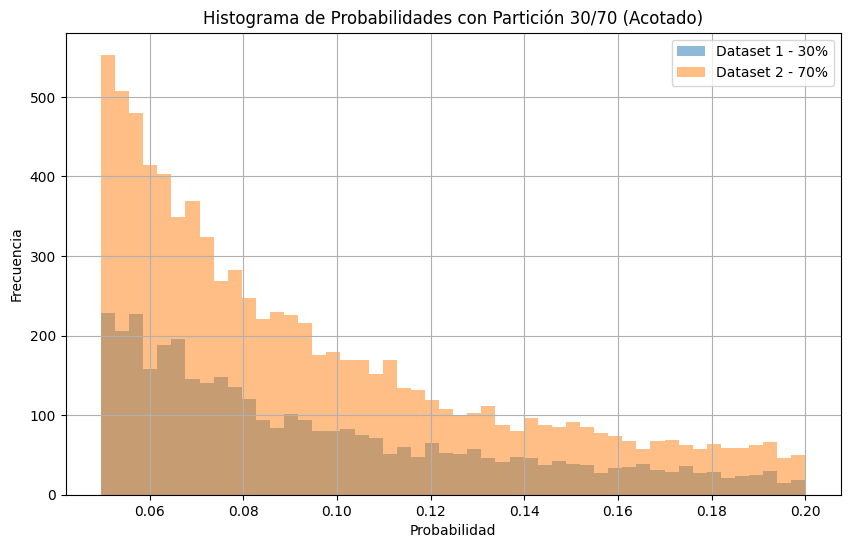

In [113]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Particion 30/70 para df_combined
df_combined_train, df_combined_test = train_test_split(df_combined['Probabilidad'], test_size=0.7, random_state=42)

# Definir el rango que deseas acotar
rango_histograma = (0.049593, 0.2)  # Ajusta este rango según tus necesidades

# Definir número de bins
bins = 50 # Ajusta este número según lo que quieras

plt.figure(figsize=(10, 6))

# Histograma para la partición 30% y 70% (acotado por rango)
plt.hist(df_combined_train, bins=bins, alpha=0.5, label='Dataset 1 - 30%', range=rango_histograma)
plt.hist(df_combined_test, bins=bins, alpha=0.5, label='Dataset 2 - 70%', range=rango_histograma)

# Agregar títulos y etiquetas
plt.title('Histograma de Probabilidades con Partición 30/70 (Acotado)')
plt.xlabel('Probabilidad')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right')
plt.grid(True)

# Mostrar el histograma
plt.show()


In [106]:
df_13000 = df_combined.head(13000)
df_13000

,numero_de_cliente,Probabilidad
0,812656770,0.903539
1,511863915,0.899408
2,1462097870,0.890252
3,606371992,0.887768
4,1021275210,0.867305
...,...,...
12995,1036537679,0.057717
12996,1019918553,0.057714
12997,837375253,0.057710
12998,1443844735,0.057696


In [74]:
df_combined[df_combined["Probabilidad"]>0.048]

,numero_de_cliente,Probabilidad,Predicted
0,812656770,0.903539,1
1,511863915,0.899408,1
2,1462097870,0.890252,1
3,606371992,0.887768,1
4,1021275210,0.867305,1
...,...,...,...
15471,655260408,0.048013,0
15472,1338758882,0.048010,0
15473,783714646,0.048010,0
15474,577580244,0.048007,0


In [84]:
df_combined

,numero_de_cliente,Probabilidad
0,812656770,0.903539
1,511863915,0.899408
2,1462097870,0.890252
3,606371992,0.887768
4,1021275210,0.867305
...,...,...
164871,339394033,0.000105
164872,554981460,0.000104
164873,674618747,0.000104
164874,490871275,0.000090


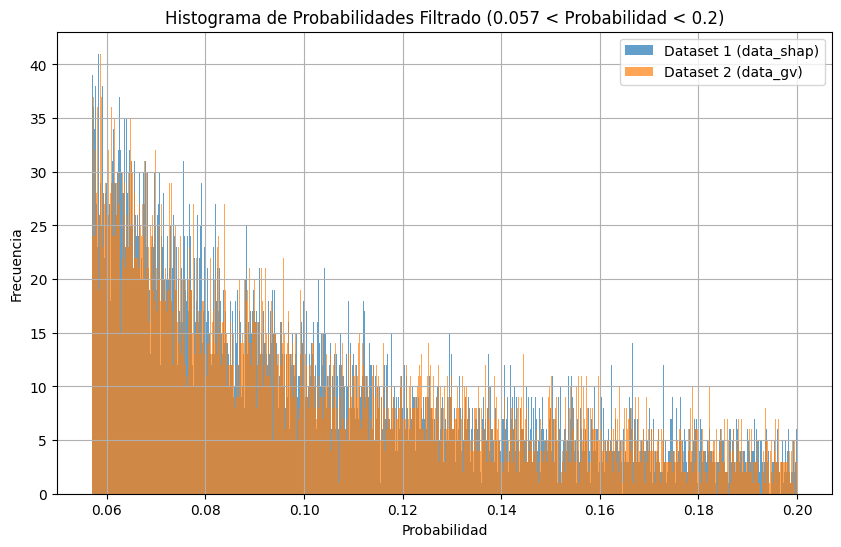

In [76]:
# Corregir la filtración con las condiciones entre paréntesis y usar "between" para mayor legibilidad
df_filtered = df_combined[df_combined["Probabilidad"].between(0.048, 0.6)]

# Definir el número de bins
bins = 1000  # Ajusta este número según lo que quieras

# Crear el histograma para la columna 'Probabilidad' en ambos datasets filtrados
plt.figure(figsize=(10, 6))

# Filtrar ambos datasets para el mismo rango
data_shap_filtered = data_shap[data_shap["Probabilidad"].between(0.057, 0.2)]
data_gv_filtered = data_gv[data_gv["Probabilidad"].between(0.057, 0.2)]

# Crear los histogramas con los datos filtrados
plt.hist(data_shap_filtered['Probabilidad'], bins=bins, alpha=0.7, label='Dataset 1 (data_shap)')
plt.hist(data_gv_filtered['Probabilidad'], bins=bins, alpha=0.7, label='Dataset 2 (data_gv)')

# Agregar títulos y etiquetas
plt.title('Histograma de Probabilidades Filtrado (0.057 < Probabilidad < 0.2)')
plt.xlabel('Probabilidad')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right')
plt.grid(True)

# Mostrar el histograma
plt.show()

In [85]:
df_combined

,numero_de_cliente,Probabilidad
0,812656770,0.903539
1,511863915,0.899408
2,1462097870,0.890252
3,606371992,0.887768
4,1021275210,0.867305
...,...,...
164871,339394033,0.000105
164872,554981460,0.000104
164873,674618747,0.000104
164874,490871275,0.000090


In [23]:
api = KaggleApi()
api.authenticate()

In [26]:
tb_entrega=df_combined
cortes = range(11800,15000,400)
#v. Generamos las distintas predicciones de clases a partir de los distintos cortes posibles.
num_subida_kaggle = 12
for envios in cortes:
    #1. Le ponemos clase 1 ("BAJA") a los primeros "envios" con mayor probabilidad.
    tb_entrega['Predicted'] = 0
    tb_entrega.iloc[:envios, tb_entrega.columns.get_loc('Predicted')] = 1
    resultados = tb_entrega[["numero_de_cliente", 'Predicted']].reset_index(drop=True)
    
    print("Cantidad de clientes {}".format(envios))
    #2. Guardamos el archivo para Kaggle.
    nombre_archivo = "Ensamble_shap_gustavo{}.csv".format(num_subida_kaggle)
    ruta_archivo= "../../../exp/{}".format(nombre_archivo)
    resultados.to_csv(ruta_archivo, index=False)
    
    num_subida_kaggle += 1
    
    #3. Envío a Kaggle.
    #a. Defino los parámetros claves.
    mensaje = f'Archivo {nombre_archivo}.Punto_corte: {envios}.'
    competencia = 'dm-ey-f-2024-primera'
    #c. Subo la Submission.
    while True:
        try:
            api.competition_submit(file_name=ruta_archivo, message=mensaje, competition=competencia)
            print("Submission successful!")
            break
        except ApiException as e:
            print(f"Error: {e}")  # Imprime la excepción completa para ver qué atributos tiene
            if e.status == 429:  # Reemplaza esto si `status` no es correcto
                print("Rate limit exceeded. Retrying after 30 seconds...")
                time.sleep(30)
            else:
                raise e  # Re-raise other exceptions

Cantidad de clientes 11800


100%|██████████| 2.08M/2.08M [00:02<00:00, 868kB/s] 


Submission successful!
Cantidad de clientes 12200


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.34MB/s]


Submission successful!
Cantidad de clientes 12600


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.29MB/s]


Submission successful!
Cantidad de clientes 13000


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.30MB/s]


Submission successful!
Cantidad de clientes 13400


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.32MB/s]


Submission successful!
Cantidad de clientes 13800


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.29MB/s]


Submission successful!
Cantidad de clientes 14200


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.33MB/s]


Submission successful!
Cantidad de clientes 14600


100%|██████████| 2.08M/2.08M [00:01<00:00, 1.30MB/s]


Submission successful!
